# Global Powerplant Database

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loaded the dataset from my computer

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we have 907 rows and 27 columns in our dataframe

We have to power classification as well as regression on global powerplant database 

for our classififcation model we have primary fuel(energy source used in primary electricity generation or export) as our target variable since it has categorical data present in it

for our regression model we have capacity_mw(electrical generating capacity in megawatts) as our target variables since it has continuous data

# EDA

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

we want to display all the columns and rows present in our DataFrame

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

we have 27 columns in our DataFrame

# Checking Null Values in our Data Frame

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we can see that a lot of columns have missing data. columns other_fuel1, other_fuel2, other_fuel3, owner, wepp_id , generation_dwh_2013,generation_dwh_2014, generation_dwh_2015, generation_dwh_2016, generation_dwh_2017, generation_dwh_2018, generation_dwh_2019, generation_data_source. estimated_generation_gwh have a lot of missing data

i will drop the columns that have more than 450 null values, as more than half of the rows in that column will have null values and there is no point in filling majority of the data with the mean value

In [6]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

we hav Nan values in latitude, longitude , geolocation_source. We will be dropping the other columns

In [7]:
df[df['latitude'].isna()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
14,IND,India,ANOOPGARH ST I&II,IND0000012,9.00,NaN,NaN,Hydro,NaN,NaN,NaN,1987.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,IND,India,Abhijeet,WRI1020238,50.00,NaN,NaN,Solar,NaN,NaN,NaN,2015.0,Ener-t International Ltd.,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,IND,India,BAGLIHAR HEP-II,IND0000021,450.00,NaN,NaN,Hydro,NaN,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,55.3220,1750.18510,1812.84025,1848.620450,NaN,Central Electricity Authority,NaN
45,IND,India,BALCO TPP,IND0000025,600.00,NaN,NaN,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,1437.9547,2800.00000,2120.68000,2553.000000,NaN,Central Electricity Authority,NaN
67,IND,India,BCPL Wind Farm,WRI1026675,5.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,Bharat Petroleum Corporation Limited,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1218...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,IND,India,BELLARY DG,IND0000044,25.20,NaN,NaN,Oil,NaN,NaN,NaN,2000.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,0.00,0.0000,0.00000,0.00000,0.000000,NaN,Central Electricity Authority,NaN
178,IND,India,DIMBE,IND0000102,5.00,NaN,NaN,Hydro,NaN,NaN,NaN,1997.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,IND,India,Davangere Wind Farm,WRI1026100,125.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,IND,India,E.G. CANAL,IND0000110,15.00,NaN,NaN,Hydro,NaN,NaN,NaN,1996.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,IND,India,Essel Mining Wind Farm,WRI1026101,75.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/filestorage/O/6/L/O6LOW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df['geolocation_source'].isna()]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
25,IND,India,Abhijeet,WRI1020238,50.00,NaN,NaN,Solar,NaN,NaN,NaN,2015.0,Ener-t International Ltd.,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,IND,India,BCPL Wind Farm,WRI1026675,5.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,Bharat Petroleum Corporation Limited,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1218...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,IND,India,Davangere Wind Farm,WRI1026100,125.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1142...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,IND,India,Essel Mining Wind Farm,WRI1026101,75.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/filestorage/O/6/L/O6LOW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,IND,India,Gujurat Solar On,WRI1020243,28.00,NaN,NaN,Solar,NaN,NaN,NaN,2014.0,Cargo Solar Power,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,IND,India,KVK Energy Solar Project,WRI1020244,100.00,NaN,NaN,Solar,NaN,NaN,NaN,2013.0,KVK Energy Ventures Ltd,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,IND,India,Landewadi Wind Farm,WRI1026790,4.00,NaN,NaN,Wind,NaN,NaN,NaN,NaN,Serum Institute of India Limited,CDM,https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,IND,India,Megha Solar Plant,WRI1020245,50.00,NaN,NaN,Solar,NaN,NaN,NaN,2014.0,Megha Engineering and Infrastructure,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,IND,India,NSL Wind Farm,WRI1026676,27.65,NaN,NaN,Wind,NaN,NaN,NaN,NaN,Nuziveedu Seeds limited,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1173...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,IND,India,RSMNL Wind Farm,WRI1026679,22.50,NaN,NaN,Wind,NaN,NaN,NaN,NaN,Rajasthan State Mines and Minerals Limited,CDM,https://cdm.unfccc.int/Projects/DB/BVQI1201770...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping Columns

In [9]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2018",'generation_gwh_2019', "estimated_generation_gwh"], axis=1, inplace=True)

i have dropped the columns that have more than half of null values, but have retained generation data source

In [10]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,2008.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,Central Electricity Authority


we have 907 rows and 14 columns now for further analysis

In [11]:
df.shape

(907, 14)

# Checking Unique Values

In [12]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_data_source      1
dtype: int64

from the unique function i observe that the country and country long column has only 1 unique value out of 907 rows and hence i feel it is redundant for our analysis

the year_of_capacity_data column has only 1 unique value and is redundant and can be deleted

similarly the generation_data_source can be deleted too

After going to through the columns description i feel the url column is also redundant and cannot help in building our ML model, and therefore it is best to drop this also. The name and gppd_idnr column has 907 unique values which can hinder with the training of our data, therefore we will remove that too



In [13]:
df=df.drop(['country','country_long','name','gppd_idnr','year_of_capacity_data','generation_data_source','url'],axis=1)

In [14]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.500,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.000,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI
2,39.200,21.9038,69.3732,Wind,NaN,CDM,WRI
3,135.000,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.000,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI
5,250.000,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,WRI
6,60.000,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,WRI
7,192.000,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,WRI
8,290.000,16.3300,75.8863,Hydro,2004.0,Central Electricity Authority,WRI
9,210.000,23.1642,81.6373,Coal,2008.0,Central Electricity Authority,WRI


In [15]:
df.shape

(907, 7)

we now have 907 rows and 7 columns for further analysis. Initailly we had 27 columns which means that 20 columns were redundant

# DataFrame Description

In [16]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,907.000000,861.000000,861.000000,527.000000
mean,326.223755,21.197918,77.464907,1997.091082
std,590.085456,6.239612,4.939316,17.082868
min,0.000000,8.168900,68.644700,1927.000000
25%,16.725000,16.773900,74.256200,1988.000000
50%,59.200000,21.780000,76.719500,2001.000000
75%,385.250000,25.512400,79.440800,2012.000000
max,4760.000000,34.649000,95.408000,2018.000000


We have a lot of outliers present which can be observed from the differnce between the three quartiles(25%,50%and 75%) and the max value

From the count we can see that there is some missing data also present in some columns

The describe function describes only the int and float values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


from the info function we can see that there are missing values present in latitude, longitute, commisioning_year, geolocation_source

We have few columns of object data type which will have to be encoded and changed to int

# Filling Missing Data

In [18]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df['latitude']

0      28.183900
1      24.766300
2      21.903800
3      23.871200
4      21.960300
5      23.768900
6      10.454700
7      32.225800
8      16.330000
9      23.164200
10     21.078200
11     31.271700
12     24.200700
13     31.241200
14     21.197918
15     24.201000
16     25.179700
17     23.066600
18     23.065500
19     18.084500
20     19.586700
21     16.770800
22     26.628200
23     21.743800
24     19.788100
25     21.197918
26     28.361500
27     14.575100
28     14.945500
29     18.858000
30     10.724500
31     14.479100
32     27.347300
33     27.360000
34     27.363200
35     27.366100
36     27.353700
37     27.350400
38     27.356600
39     28.506000
40     16.280400
41     33.181500
42     21.197918
43     32.806300
44     23.828500
45     21.197918
46     18.139600
47     19.860100
48     24.692900
49     22.342100
50     22.995600
51     32.168600
52     24.191700
53     24.191700
54     24.191700
55     24.223000
56     23.602600
57     21.911400
58     23.8070

In [19]:
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))
df['longitude']

0      73.240700
1      74.609000
2      69.373200
3      91.360200
4      82.409100
5      68.644700
6      77.007800
7      77.207000
8      75.886300
9      81.637300
10     77.900900
11     76.493800
12     82.800000
13     77.876900
14     77.464907
15     82.789100
16     76.318800
17     81.784100
18     81.786500
19     76.185100
20     74.706100
21     74.919100
22     79.528600
23     83.274100
24     79.151800
25     77.464907
26     74.240200
27     76.392600
28     77.687000
29     73.639600
30     77.189300
31     76.348200
32     71.691700
33     71.691800
34     71.691800
35     71.691600
36     71.691700
37     71.691800
38     71.691700
39     77.306600
40     75.225000
41     75.315500
42     77.464907
43     76.141800
44     87.451300
45     77.464907
46     82.122100
47     79.342100
48     74.689000
49     82.430500
50     88.404200
51     76.469500
52     81.287500
53     81.287500
54     81.287500
55     81.274700
56     74.256200
57     83.188900
58     91.5650

In [20]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['commissioning_year']

0      2011.0
1      2015.0
2      2015.0
3      2004.0
4      2015.0
5      2005.0
6      1970.0
7      2010.0
8      2004.0
9      2008.0
10     2014.0
11     1985.0
12     2011.0
13     1986.0
14     1987.0
15     2000.0
16     1989.0
17     2015.0
18     2015.0
19     2015.0
20     2015.0
21     2015.0
22     1989.0
23     2017.0
24     2015.0
25     2015.0
26     2015.0
27     2015.0
28     2015.0
29     2015.0
30     2015.0
31     2015.0
32     2015.0
33     2015.0
34     2015.0
35     2015.0
36     2015.0
37     2015.0
38     2015.0
39     1977.0
40     2015.0
41     2008.0
42     2015.0
43     1980.0
44     2003.0
45     2015.0
46     1984.0
47     2015.0
48     2015.0
49     2015.0
50     1976.0
51     1996.0
52     1991.0
53     2002.0
54     2001.0
55     2006.0
56     2015.0
57     2014.0
58     2006.0
59     2007.0
60     1988.0
61     2014.0
62     2011.0
63     2010.0
64     1996.0
65     2003.0
66     1973.0
67     2015.0
68     2015.0
69     2015.0
70     2015.0
71    

In [21]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['geolocation_source']

0      National Renewable Energy Laboratory
1                                       WRI
2                                       WRI
3                                       WRI
4                                       WRI
5                                       WRI
6                                       WRI
7                                       WRI
8                                       WRI
9                                       WRI
10                                      WRI
11                                      WRI
12                                      WRI
13                                      WRI
14                                      WRI
15                                      WRI
16                                      WRI
17                                      WRI
18                                      WRI
19                                      WRI
20                                      WRI
21                                      WRI
22                              

In [22]:
df.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

we have succesfully filled the missing values

# Visualization

In [23]:
df.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
geolocation_source     object
dtype: object

Count plot for object datatype

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

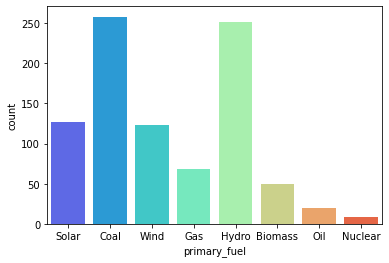

In [24]:
sns.countplot(x='primary_fuel', data=df, palette="rainbow")

we can see that the most widely used primary fuel is coal, and then Hydro fuel. Nuclear fuel is used the least as a primary fuel

<function matplotlib.pyplot.show(close=None, block=None)>

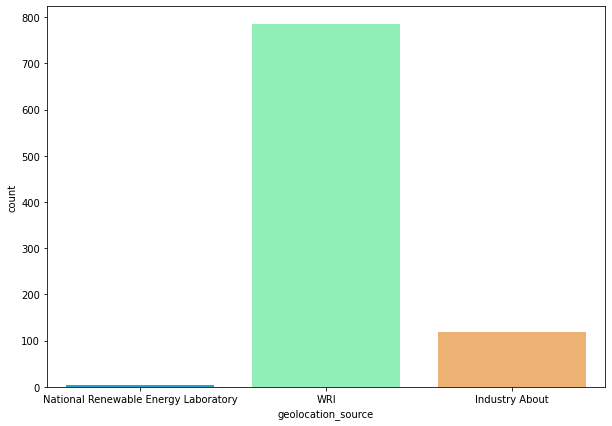

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x='geolocation_source', data=df, palette="rainbow")
plt.show

the attribution for geological information is highest for WRI(World resource informtion) and least for National Renewable Energy Laboratory

Scatter plot for float data with capacity_mw

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

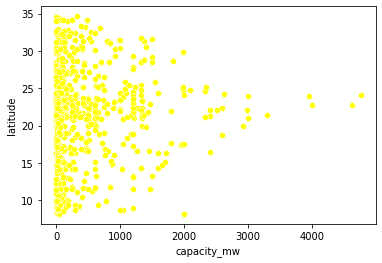

In [26]:
sns.scatterplot(x = "capacity_mw", y = "latitude", data = df,color='yellow')

we observe that the electrical energy generating capacity is maximum in latitude range (20,25)

<AxesSubplot:xlabel='capacity_mw', ylabel='longitude'>

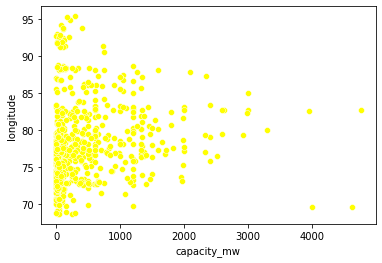

In [27]:
sns.scatterplot(x = "capacity_mw", y = "longitude", data = df,color='yellow')

we observe that the electrical energy generating capacity is maximum in longitude range (80,85)

<AxesSubplot:xlabel='capacity_mw', ylabel='commissioning_year'>

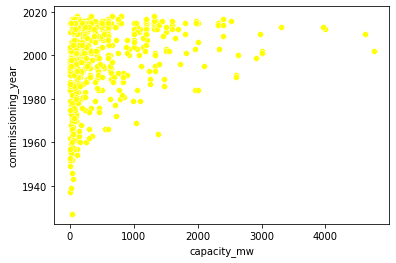

In [28]:
sns.scatterplot(x = "capacity_mw", y = "commissioning_year", data = df,color='yellow')

we ccan observe that the electrical energy generating capacity has increased substantially in the recent years as more developments have been done

Cat plot for float data with capacity_mw

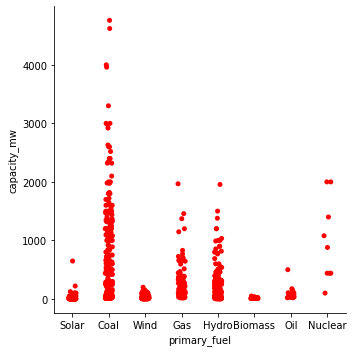

In [29]:
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df,color='red')

we observe that coal is used majorly to generate electrical energy and biomass is the least used

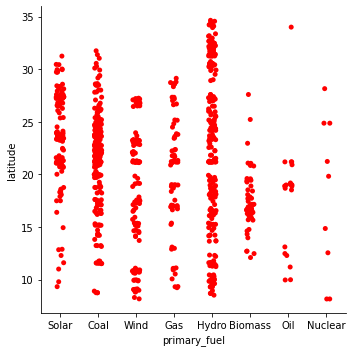

In [30]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df,color='red')

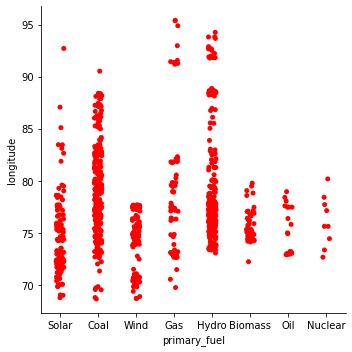

In [31]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df,color='red')

we observe that hydro fuel and coal is most widely spread based on latitutde and longitude

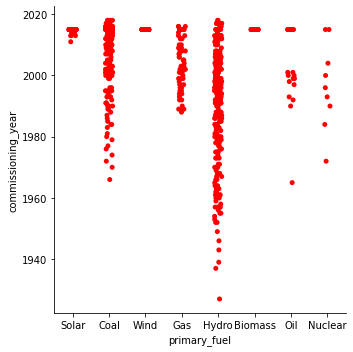

In [32]:
sns.catplot(x = "primary_fuel", y = "commissioning_year", data = df,color='red')

we observe that hydro fuel has been operating for the longest time , from around 1900 till present

# Encoding

i will use ordinal encoding instead of one hot coding as a lot of categories are present

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.500,28.183900,73.240700,6.0,2011.0,109.0,1.0
1,98.000,24.766300,74.609000,1.0,2015.0,174.0,2.0
2,39.200,21.903800,69.373200,7.0,2015.0,21.0,2.0
3,135.000,23.871200,91.360200,2.0,2004.0,22.0,2.0
4,1800.000,21.960300,82.409100,1.0,2015.0,22.0,2.0
5,250.000,23.768900,68.644700,1.0,2005.0,22.0,2.0
6,60.000,10.454700,77.007800,3.0,1970.0,22.0,2.0
7,192.000,32.225800,77.207000,3.0,2010.0,22.0,2.0
8,290.000,16.330000,75.886300,3.0,2004.0,22.0,2.0
9,210.000,23.164200,81.637300,1.0,2008.0,22.0,2.0


we have successfully encoded our data, now we can plot the normal distribution curve

# Normal Distribution Plot

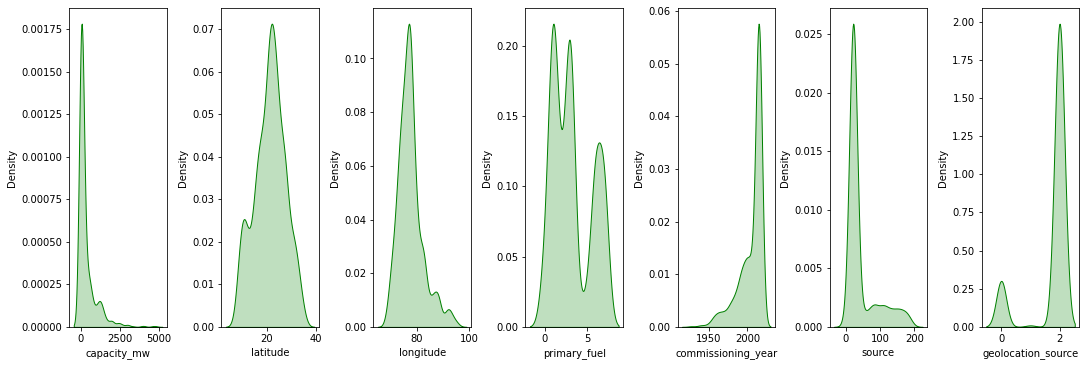

In [35]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see that right skewness is present in capacity_mw, 
little skewness in latitude and longitude
there is kewness present in primary fuel
commisioning year is left skewed
source has right skewness
the geolocation source has left skewness

Hence we can say that the data is not normally distributed

# Boxplot

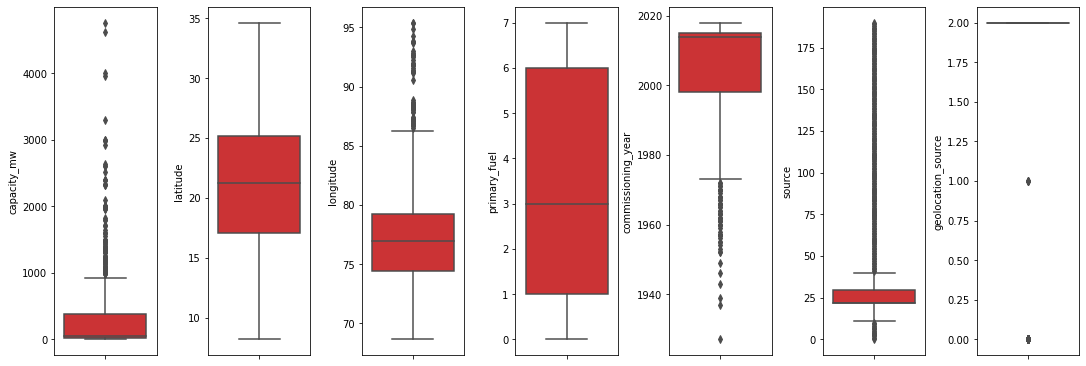

In [36]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see the presence of outliers in capacity_mw, longitude, commisioning_years and geolocation source.The source column has continuous outliers

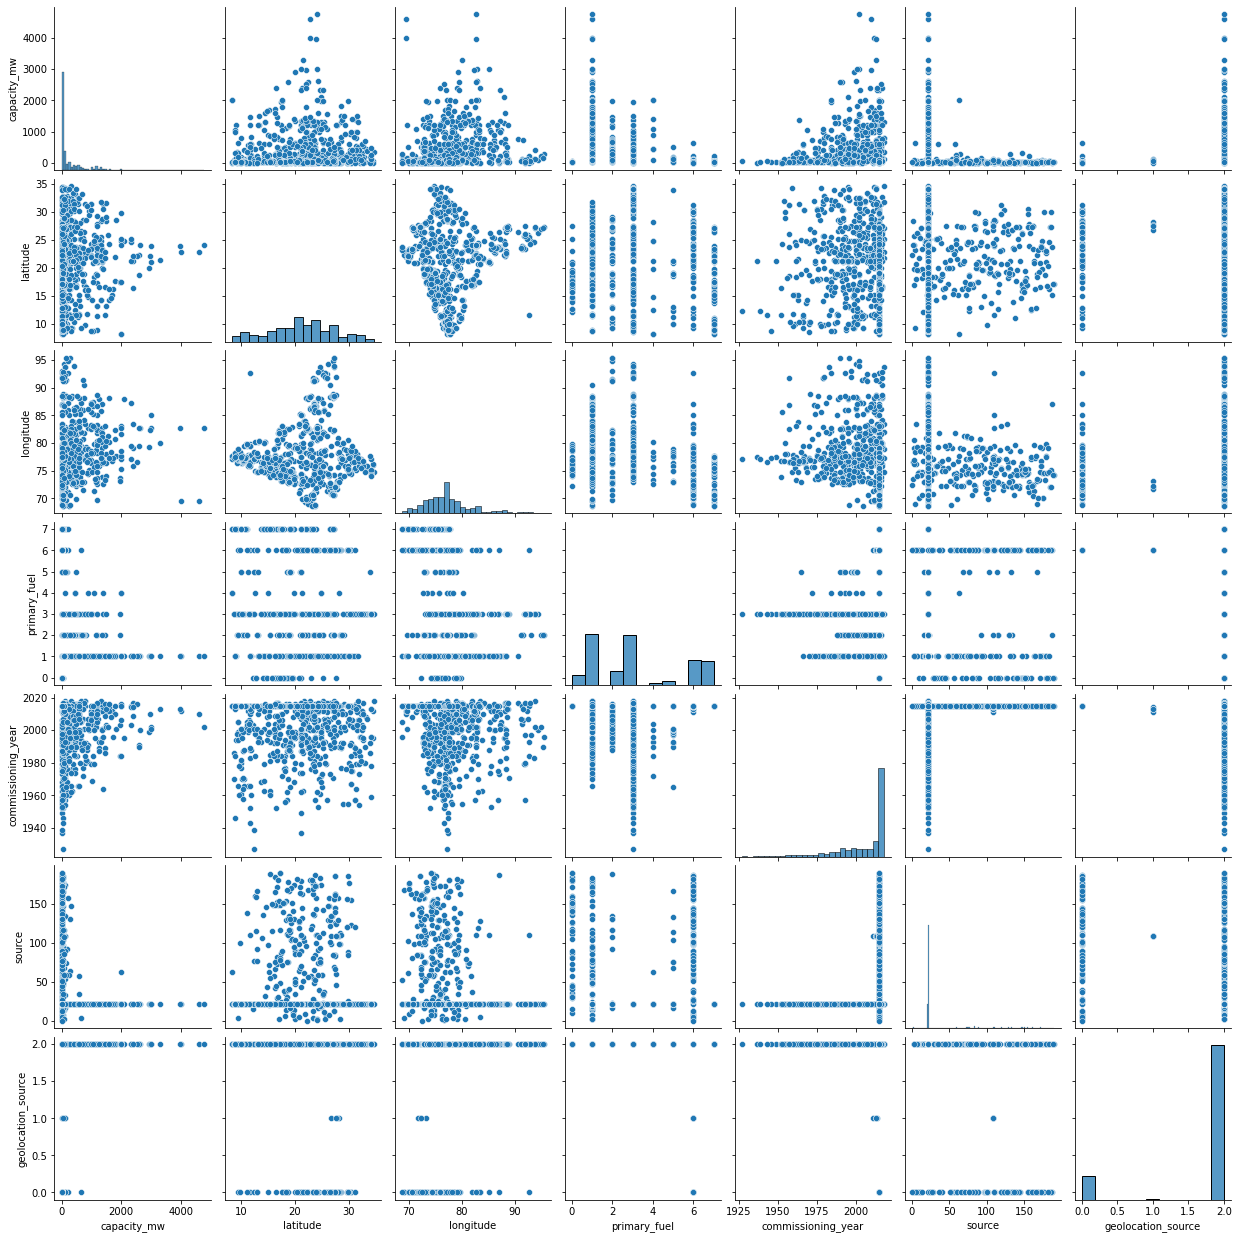

In [37]:
sns.pairplot(df)

# Correlation With target columns capacity_mw and primary_fuel

In [38]:
df.corr()['capacity_mw'].sort_values()

primary_fuel         -0.380395
source               -0.242122
commissioning_year   -0.004072
latitude              0.050984
longitude             0.195882
geolocation_source    0.204865
capacity_mw           1.000000
Name: capacity_mw, dtype: float64

In [39]:
df.corr()['primary_fuel'].sort_values()

geolocation_source   -0.483217
capacity_mw          -0.380395
longitude            -0.347948
latitude             -0.010204
source                0.053613
commissioning_year    0.164947
primary_fuel          1.000000
Name: primary_fuel, dtype: float64

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

<AxesSubplot:>

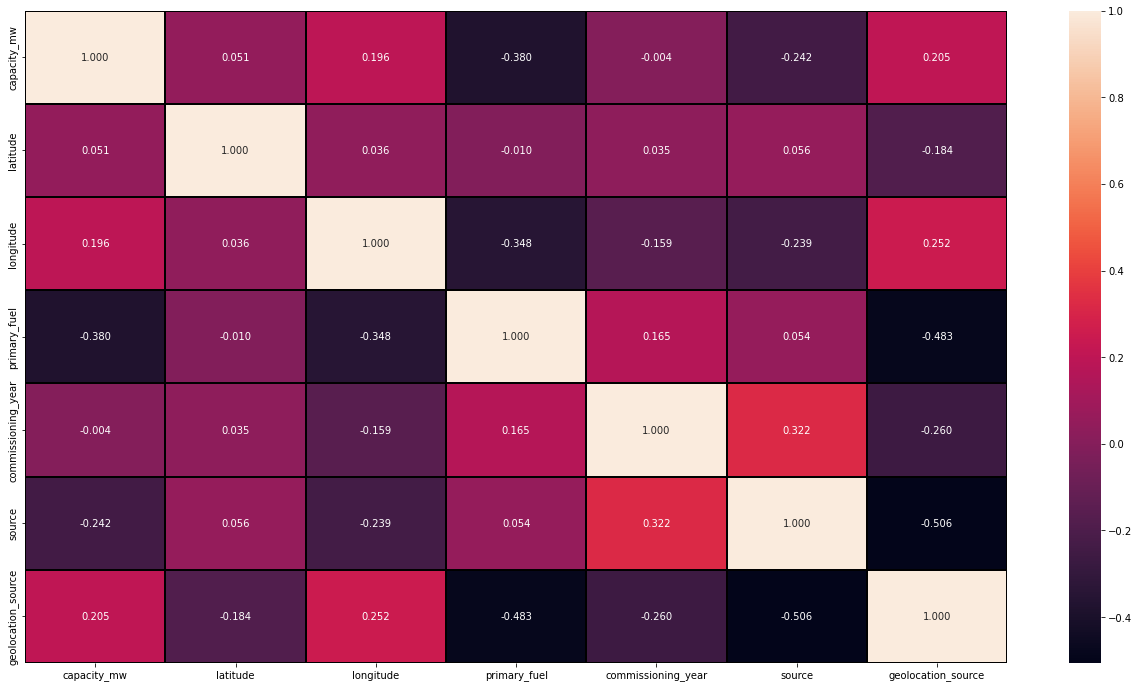

In [40]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

There no high negative or positive correlation values. Also we dont have to worry about multicollinearity

# Correlation bar plot with target variable capacity_mw

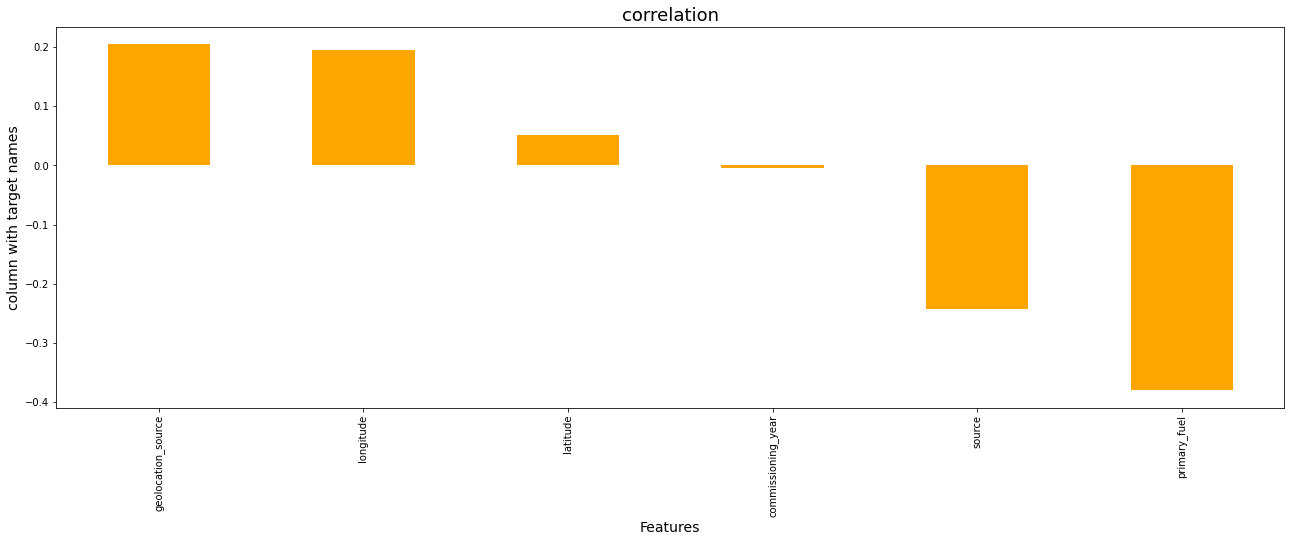

In [41]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='orange')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see the columns that are positively and negatively correlated with capacity_mw, there are more positively correlated variables

# Correlation bar plot with target variable primary_fuel

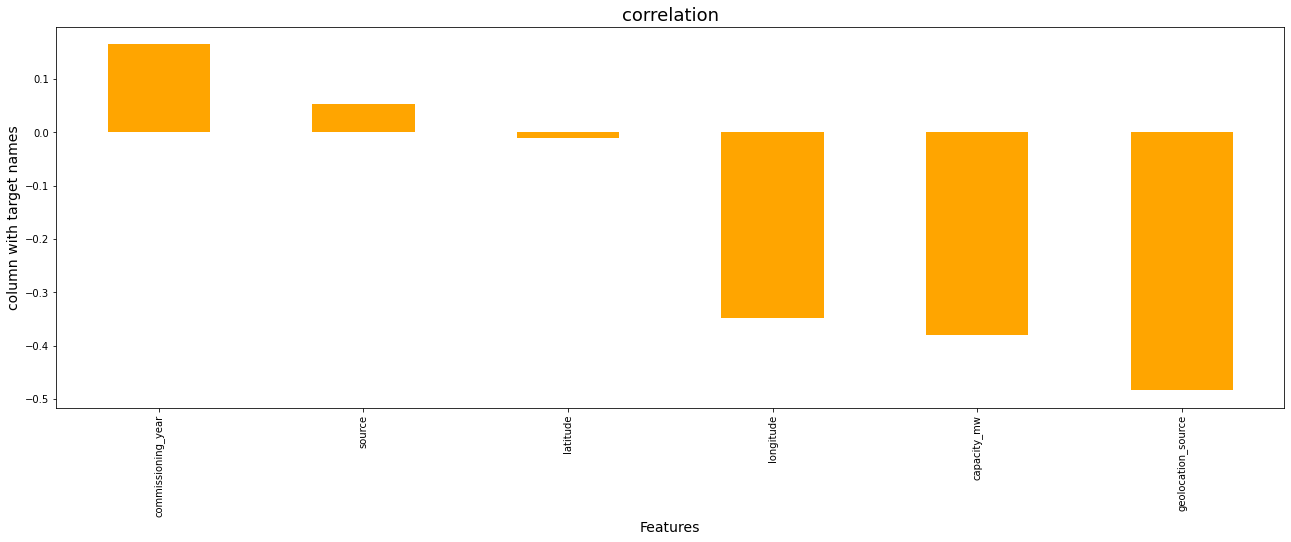

In [42]:
plt.figure(figsize=(22,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='orange')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see the columns that are positively and negatively correlated with primary fuel, there are more negatively correlated columns

# CHECKING OUTLIERS

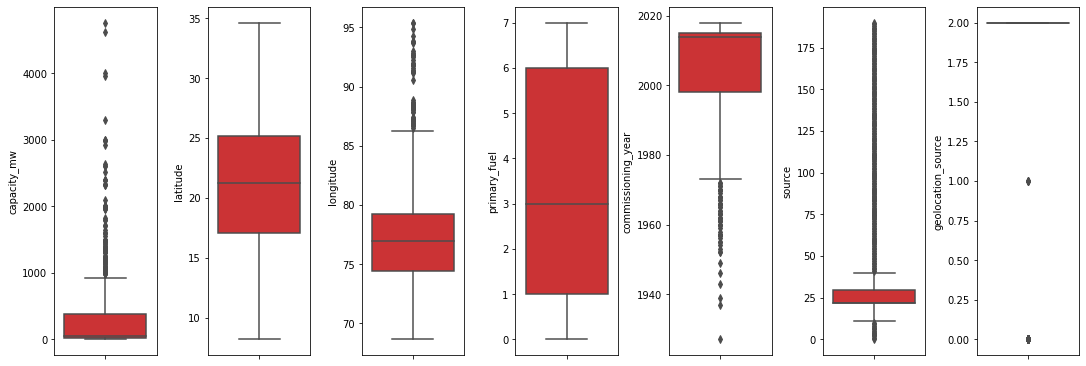

In [43]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can observe some outliers are present 

# Removing Outliers

In [44]:
df.shape

(907, 7)

Applying ZScore to remove outliers

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=2.5
np.where(z>2.5)

(array([  1,   3,  15,  24,  26,  28,  32,  33,  34,  35,  36,  37,  38,
         58,  70,  71,  78,  79,  80,  90, 103, 111, 112, 114, 115, 116,
        117, 118, 119, 120, 121, 127, 129, 130, 131, 132, 143, 147, 153,
        154, 154, 156, 158, 179, 183, 190, 191, 193, 193, 195, 195, 196,
        197, 200, 200, 209, 219, 221, 222, 239, 241, 241, 242, 242, 243,
        244, 244, 246, 247, 249, 251, 252, 254, 261, 270, 283, 284, 294,
        298, 298, 299, 299, 308, 321, 323, 333, 340, 342, 345, 347, 360,
        363, 364, 371, 373, 375, 378, 388, 393, 394, 394, 396, 397, 398,
        399, 400, 401, 402, 402, 403, 403, 404, 405, 405, 406, 406, 407,
        410, 414, 416, 417, 425, 427, 436, 437, 438, 441, 444, 454, 469,
        475, 478, 479, 480, 482, 484, 493, 494, 495, 497, 499, 501, 503,
        504, 505, 505, 508, 508, 509, 509, 518, 519, 522, 529, 538, 541,
        546, 551, 554, 555, 556, 567, 573, 577, 583, 588, 592, 597, 601,
        603, 607, 608, 609, 610, 615, 616, 617, 617

Setting the threshold as 3

In [46]:
df_new_z=df[(z<2.5).all(axis=1)]
df_new_z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.500,28.183900,73.240700,6.0,2011.0,109.0,1.0
2,39.200,21.903800,69.373200,7.0,2015.0,21.0,2.0
4,1800.000,21.960300,82.409100,1.0,2015.0,22.0,2.0
5,250.000,23.768900,68.644700,1.0,2005.0,22.0,2.0
6,60.000,10.454700,77.007800,3.0,1970.0,22.0,2.0
7,192.000,32.225800,77.207000,3.0,2010.0,22.0,2.0
8,290.000,16.330000,75.886300,3.0,2004.0,22.0,2.0
9,210.000,23.164200,81.637300,1.0,2008.0,22.0,2.0
10,1350.000,21.078200,77.900900,1.0,2014.0,22.0,2.0
11,134.000,31.271700,76.493800,3.0,1985.0,22.0,2.0


In [47]:
df_new_z.shape

(678, 7)

# Percentage Data Loss

In [48]:
Data_loss=((907-724)/907)*100
print(Data_loss,'%')

20.17640573318633 %


The percentage data loss is okay therefore we can proceed with our new dataframe

# Handling Skweness

In [49]:
df.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
commissioning_year   -1.714873
source                1.827373
geolocation_source   -2.159841
dtype: float64

if we take the range of skewness as (-0.5,0.5) then the columns capacity_mw, longitude, commisioning_year, source and geolocation source are highly skewed

# Applying Log Transform

In [50]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

capacity_mw           0.135454
latitude             -0.149698
longitude             0.935663
primary_fuel          0.472251
commissioning_year   -1.714873
source                0.866582
geolocation_source   -2.159841
dtype: float64

we have been able to remove skewness upto some extent fpr capacity_mw, longitude and source

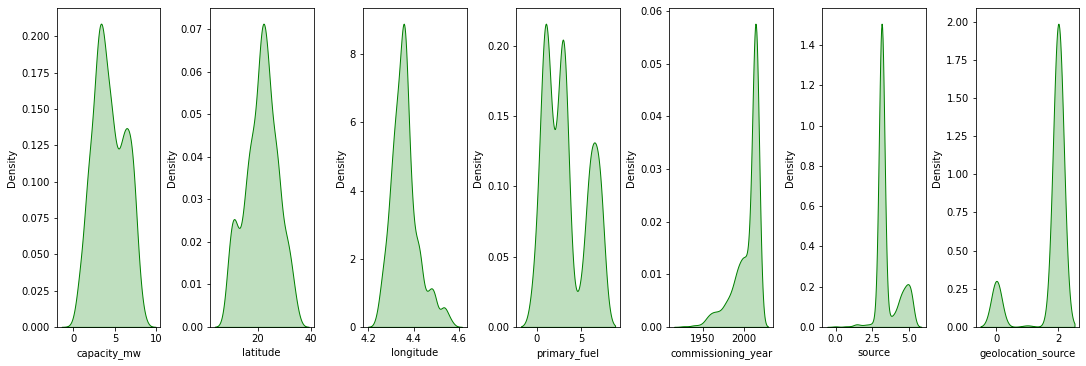

In [51]:
fig, ax = plt.subplots(ncols=7, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Clasification model with target variable primary_fuel

# Separating the columns into 'features' and 'targets' as 'x1' and 'y1' for our classification model

In [52]:
x1=df_new_z.drop('primary_fuel',axis=1)
y1=df_new_z['primary_fuel']
print(x1.shape)
print(y1.shape)

(678, 6)
(678,)


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Applying SMOTE

In [54]:
y1.value_counts()

1.0    221
3.0    201
7.0    123
2.0     58
0.0     42
5.0     18
6.0      8
4.0      7
Name: primary_fuel, dtype: int64

we can see that our data is imbalanced

In [55]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x1,y1=oversample.fit_resample(x1,y1)

In [56]:
y1.value_counts()

6.0    221
7.0    221
1.0    221
3.0    221
2.0    221
0.0    221
5.0    221
4.0    221
Name: primary_fuel, dtype: int64

we have been successful in balancing our data

# Feature Scaling

i scaling my data to avoid any biasness towards a column so that our data is standardized

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[-0.68905895,  1.49450417, -0.95782033,  0.45502786,  1.48250282,
        -4.23859335],
       [-0.58669839,  0.33154101, -2.1655151 ,  0.79984413, -0.64473878,
         0.29083222],
       [ 4.32437712,  0.34200381,  1.90517353,  0.79984413, -0.62056558,
         0.29083222],
       ...,
       [-0.66739692, -0.10357637, -0.71713644,  0.79984413, -0.64473878,
         0.29083222],
       [-0.58122919,  1.19627075, -1.52598639,  0.79984413, -0.64473878,
         0.29083222],
       [-0.63293634,  0.2008242 ,  0.36126253,  0.79984413, -0.64473878,
         0.29083222]])

# Power Transform

In [58]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')
x1

array([[-1.13224972,  1.48379996, -1.03236905,  0.23978476,  1.54349421,
        -3.10787532],
       [-0.72830636,  0.33945758, -2.86681758,  0.95217452, -0.72889545,
         0.32491296],
       [ 1.8909734 ,  0.34984417,  1.70227355,  0.95217452, -0.64414092,
         0.32491296],
       ...,
       [-1.04247223, -0.09459236, -0.71132662,  0.95217452, -0.72889545,
         0.32491296],
       [-0.70814577,  1.19199826, -1.85217767,  0.95217452, -0.72889545,
         0.32491296],
       [-0.90444693,  0.20950946,  0.4899266 ,  0.95217452, -0.72889545,
         0.32491296]])

# Finding the best accuracy at random state

In [59]:
maxAccu=0
maxRS=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 73.45890410958904 at Random State 85


# Logistic Regression

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  69.0068493150685

Classification Report 
               precision    recall  f1-score   support

         0.0       0.72      0.89      0.80        72
         1.0       0.62      0.51      0.56        72
         2.0       0.56      0.34      0.42        71
         3.0       0.54      0.46      0.50        76
         4.0       0.70      0.91      0.79        67
         5.0       0.51      0.43      0.46        75
         6.0       0.88      1.00      0.93        77
         7.0       0.82      0.99      0.90        74

    accuracy                           0.69       584
   macro avg       0.67      0.69      0.67       584
weighted avg       0.67      0.69      0.67       584

Cross Validation Score: 69.62692658568204

Accuracy Score - Cross Validation Score is -0.6200772706135496


# Support vector classifier

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.82191780821918

Classification Report 
               precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        72
         1.0       0.85      0.57      0.68        72
         2.0       0.68      0.58      0.63        71
         3.0       0.89      0.62      0.73        76
         4.0       0.71      1.00      0.83        67
         5.0       0.75      0.79      0.77        75
         6.0       0.86      1.00      0.92        77
         7.0       0.86      1.00      0.92        74

    accuracy                           0.81       584
   macro avg       0.81      0.81      0.80       584
weighted avg       0.81      0.81      0.80       584

Cross Validation Score: 79.69622765320658

Accuracy Score - Cross Validation Score is 1.125690155012606


# Decision Tree Classifier

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  86.98630136986301

Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        72
         1.0       0.70      0.68      0.69        72
         2.0       0.71      0.79      0.75        71
         3.0       0.86      0.74      0.79        76
         4.0       0.86      0.99      0.92        67
         5.0       0.94      0.83      0.88        75
         6.0       0.97      1.00      0.99        77
         7.0       1.00      1.00      1.00        74

    accuracy                           0.87       584
   macro avg       0.87      0.87      0.87       584
weighted avg       0.87      0.87      0.87       584

Cross Validation Score: 86.82207391046879

Accuracy Score - Cross Validation Score is 0.16422745939422612


# KNeighborsClassifier

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  85.1027397260274

Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        72
         1.0       0.85      0.65      0.74        72
         2.0       0.72      0.69      0.71        71
         3.0       0.92      0.71      0.80        76
         4.0       0.72      0.99      0.83        67
         5.0       0.86      0.83      0.84        75
         6.0       0.97      1.00      0.99        77
         7.0       0.87      1.00      0.93        74

    accuracy                           0.85       584
   macro avg       0.85      0.85      0.85       584
weighted avg       0.86      0.85      0.85       584

Cross Validation Score: 85.18061490693171

Accuracy Score - Cross Validation Score is -0.07787518090431433


# Random Forest Classifier

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  90.41095890410958

Classification Report 
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        72
         1.0       0.80      0.74      0.77        72
         2.0       0.82      0.85      0.83        71
         3.0       0.90      0.80      0.85        76
         4.0       0.85      1.00      0.92        67
         5.0       0.94      0.91      0.93        75
         6.0       1.00      0.99      0.99        77
         7.0       0.97      1.00      0.99        74

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584

Cross Validation Score: 90.89323154238889

Accuracy Score - Cross Validation Score is -0.4822726382793121


# Extra Trees Classifier

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=16)

et=ExtraTreesClassifier()
#training the model
et.fit(x_train,y_train)
    
#Predicting y_test
pred=et.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(et,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  91.95205479452055

Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        72
         1.0       0.85      0.79      0.82        72
         2.0       0.90      0.87      0.89        71
         3.0       0.90      0.86      0.88        76
         4.0       0.88      1.00      0.94        67
         5.0       0.96      0.89      0.92        75
         6.0       1.00      1.00      1.00        77
         7.0       0.94      1.00      0.97        74

    accuracy                           0.92       584
   macro avg       0.92      0.92      0.92       584
weighted avg       0.92      0.92      0.92       584

Cross Validation Score: 92.02461548310687

Accuracy Score - Cross Validation Score is -0.07256068858632148


# I will choose decision tree classifier for hyperparameter tuning as it is giving me the least value of accuracy score-cross validation

# Hyperparametertuning on decision tree classifier

the parameter have been chosen after referring from the sklearn webpage

In [66]:
from sklearn.model_selection import GridSearchCV
fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ['best','random'],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [67]:
GSCV = GridSearchCV(dt, fmod_param, cv=5)

In [68]:
GSCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [42, 45, 111],
                         'splitter': ['best', 'random']})

In [69]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 3,
 'random_state': 111,
 'splitter': 'best'}

In [70]:
GSCV.best_score_

0.8395337195165558

In [71]:
Final_Model = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_split=2,random_state=45,splitter='best')
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
hcvs=cross_val_score(rf,x1,y1,cv=5)

Accuracy score for the Best Model is: 86.64383561643835


we have reached the threshold of hyperparameter tuning and further if we perform it we will see a cecrease in accuracy

# AOC ROC Curve

In [72]:
from sklearn.metrics import roc_auc_score
y_prob = Classifier.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.923619 (macro),
0.923744 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.923655 (macro),
0.923902 (weighted by prevalence)


# Confusion Matrix

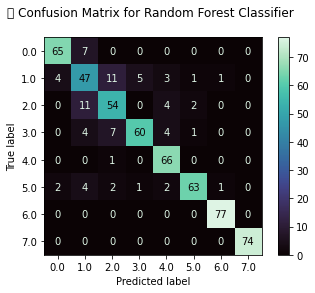

In [73]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)

# Saving the Best Model

In [74]:
import pickle
filename='Global_Powerplant_Database_E4.pkl'
pickle.dump(dt,open(filename,'wb'))

# Conclusion

In [75]:
loaded_model=pickle.load(open('Global_Powerplant_Database_E4.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100,'%')

86.98630136986301 %


In [76]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['Predcited','Original'])

In [77]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583
Predcited,1.0,2.0,7.0,3.0,6.0,6.0,6.0,7.0,1.0,6.0,6.0,0.0,1.0,5.0,7.0,1.0,2.0,0.0,5.0,2.0,5.0,5.0,7.0,6.0,7.0,2.0,7.0,2.0,6.0,1.0,6.0,4.0,5.0,2.0,4.0,0.0,6.0,0.0,1.0,5.0,3.0,4.0,2.0,2.0,7.0,7.0,0.0,3.0,4.0,1.0,3.0,2.0,1.0,0.0,3.0,5.0,4.0,5.0,3.0,2.0,0.0,7.0,3.0,0.0,7.0,0.0,2.0,3.0,6.0,0.0,2.0,6.0,3.0,0.0,5.0,5.0,4.0,3.0,3.0,7.0,0.0,3.0,2.0,4.0,0.0,3.0,3.0,5.0,2.0,5.0,6.0,4.0,0.0,3.0,1.0,5.0,7.0,5.0,6.0,1.0,6.0,0.0,4.0,5.0,6.0,1.0,0.0,6.0,0.0,2.0,2.0,1.0,0.0,4.0,0.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,5.0,1.0,7.0,1.0,7.0,3.0,1.0,4.0,5.0,4.0,3.0,7.0,3.0,2.0,7.0,4.0,1.0,0.0,7.0,3.0,4.0,3.0,6.0,3.0,7.0,4.0,1.0,4.0,3.0,3.0,4.0,6.0,6.0,3.0,0.0,5.0,7.0,2.0,6.0,7.0,4.0,1.0,7.0,5.0,4.0,3.0,3.0,1.0,7.0,5.0,0.0,7.0,7.0,1.0,0.0,6.0,1.0,0.0,7.0,5.0,4.0,4.0,0.0,2.0,2.0,0.0,7.0,3.0,1.0,7.0,3.0,6.0,2.0,3.0,4.0,1.0,5.0,7.0,4.0,3.0,0.0,1.0,6.0,4.0,3.0,6.0,6.0,4.0,2.0,1.0,4.0,0.0,5.0,1.0,3.0,2.0,6.0,7.0,0.0,0.0,0.0,5.0,0.0,7.0,1.0,2.0,0.0,3.0,6.0,6.0,0.0,3.0,0.0,4.0,2.0,1.0,7.0,4.0,6.0,6.0,2.0,6.0,0.0,7.0,7.0,2.0,6.0,0.0,5.0,2.0,0.0,4.0,1.0,1.0,2.0,0.0,2.0,3.0,1.0,6.0,4.0,6.0,7.0,3.0,5.0,2.0,5.0,5.0,6.0,2.0,4.0,2.0,2.0,7.0,2.0,2.0,6.0,7.0,4.0,1.0,1.0,2.0,2.0,3.0,5.0,0.0,4.0,3.0,5.0,7.0,0.0,4.0,4.0,7.0,1.0,3.0,2.0,6.0,0.0,0.0,5.0,4.0,4.0,3.0,6.0,5.0,6.0,1.0,5.0,0.0,2.0,2.0,4.0,4.0,3.0,6.0,4.0,7.0,2.0,2.0,4.0,7.0,3.0,1.0,7.0,6.0,0.0,3.0,3.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,6.0,0.0,0.0,2.0,6.0,0.0,2.0,0.0,7.0,6.0,5.0,1.0,0.0,5.0,1.0,0.0,7.0,4.0,7.0,6.0,0.0,6.0,2.0,6.0,4.0,2.0,7.0,1.0,4.0,4.0,1.0,1.0,7.0,0.0,6.0,0.0,4.0,5.0,1.0,6.0,1.0,2.0,2.0,2.0,4.0,4.0,5.0,7.0,6.0,7.0,0.0,1.0,0.0,2.0,5.0,1.0,2.0,1.0,2.0,0.0,7.0,4.0,0.0,3.0,2.0,1.0,5.0,5.0,2.0,7.0,2.0,4.0,3.0,7.0,1.0,3.0,7.0,1.0,3.0,5.0,2.0,5.0,4.0,6.0,2.0,3.0,1.0,2.0,2.0,7.0,6.0,0.0,2.0,6.0,4.0,7.0,6.0,7.0,2.0,6.0,6.0,1.0,1.0

# Regression model with target varaible capacity_mw

# Separating the columns into 'features' and 'targets' as 'x' and 'y

In [78]:
x=df_new_z.drop('capacity_mw',axis=1)
y=df_new_z['capacity_mw']
print(x.shape)
print(y.shape)

(678, 6)
(678,)


# Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[  1.20685466,  -1.02297293,   1.37725255,   0.4526779 ,
          2.5343021 , -12.98075499],
       [  0.19563328,  -1.97927423,   1.82169673,   0.76059425,
         -0.39191857,   0.07703712],
       [  0.20473091,   1.24406076,  -0.84496836,   0.76059425,
         -0.35866606,   0.07703712],
       ...,
       [ -0.87160694,  -0.44427156,   1.82169673,   0.76059425,
         -0.39191857,   0.07703712],
       [  0.58952028,  -0.89760907,  -0.84496836,   0.76059425,
          0.87167672,   0.07703712],
       [ -1.73167889,   0.02447062,   1.82169673,   0.76059425,
         -0.39191857,   0.07703712]])

# Power Transform

In [80]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[  1.20496885,  -1.10203151,   1.31668104,   0.22438339,
          2.13005025, -12.98075499],
       [  0.1992161 ,  -2.50509208,   1.54303354,   0.89912162,
         -0.41986204,   0.07703712],
       [  0.20829662,   1.21647999,  -0.92413938,   0.89912162,
         -0.24552886,   0.07703712],
       ...,
       [ -0.8710998 ,  -0.36379286,   1.54303354,   0.89912162,
         -0.41986204,   0.07703712],
       [  0.59175675,  -0.93423216,  -0.92413938,   0.89912162,
          1.84694429,   0.07703712],
       [ -1.7388097 ,   0.15711172,   1.54303354,   0.89912162,
         -0.41986204,   0.07703712]])

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Finding the best Random State

In [114]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (r2_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 36.61592530835105 at Random State 384


# Linear Regression

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

lr=LinearRegression()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 369.0468145632331
R2 Score is: 19.813431562434868
Cross Validation Score: 18.364507936935087
R2 Score - Cross Validation Score is 1.4489236254997806


# Support Vector Regression

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

svr=SVR()
# Training the model
lr.fit(x_train,y_train)
    
# Predicting Y_test
pred = lr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(lr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 369.0468145632331
R2 Score is: 19.813431562434868
Cross Validation Score: 18.364507936935087
R2 Score - Cross Validation Score is 1.4489236254997806


# Decision Tree Regressor

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

dtr=DecisionTreeRegressor()
# Training the model
dtr.fit(x_train,y_train)
    
# Predicting Y_test
pred = dtr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(dtr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 388.5150497803786
R2 Score is: 11.130159764971859
Cross Validation Score: 18.29643693392046
R2 Score - Cross Validation Score is -7.166277168948602


# RandomForestRegressor

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

rfr=RandomForestRegressor()
# Training the model
rfr.fit(x_train,y_train)
    
# Predicting Y_test
pred = rfr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(rfr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 285.8893196239724
R2 Score is: 51.87900835035838
Cross Validation Score: 48.925113109244
R2 Score - Cross Validation Score is 2.953895241114381


# Extreme Gradient Boosting

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

xgbr=XGBRegressor()
# Training the model
xgbr.fit(x_train,y_train)
    
# Predicting Y_test
pred= xgbr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(xgbr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 313.1879212221989
R2 Score is: 42.250435347334005
Cross Validation Score: 41.3920472389634
R2 Score - Cross Validation Score is 0.8583881083706046


# Extra Trees Classifier

In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=256)

etr=ExtraTreesRegressor()
# Training the model
etr.fit(x_train,y_train)
    
# Predicting Y_test
pred= etr.predict(x_test)
    
# RMSE - a lower RMSE score is better than a higher one
rmse = mean_squared_error(y_test, pred, squared=False)
print("RMSE Score is:", rmse)
    
# R2 score
r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    
# Cross Validation Score
cv_score = (cross_val_score(etr, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
    
# Result of r2 score minus cv score
result = r2 - cv_score
print("R2 Score - Cross Validation Score is", result)

RMSE Score is: 294.08986555095834
R2 Score is: 49.07877722279726
Cross Validation Score: 46.386889710668214
R2 Score - Cross Validation Score is 2.6918875121290426


i have chosen random forest regressor for hyperparamter tuning as it is giving a higher accuracy and the difference between the r2_score and cross validation score is better compared to models with similar accuracy

# Hyperparameter tuning on Random Forest Regressor

i have chosen the parameters after referring from the sklearn webpage

In [121]:
fmod_param = {'criterion' : ['squared_error', 'absolute_error','poisson'],
              'max_features':['auto','sqrt','log2'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [122]:
GSCV = GridSearchCV(rfr, fmod_param, cv=5)

In [123]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [124]:
GSCV.best_params_

{'criterion': 'squared_error',
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -1,
 'random_state': 135}

In [125]:
Final_Model = RandomForestRegressor(criterion='squared_error', max_features='sqrt', n_estimators=100,min_samples_split=3 ,n_jobs=-1,random_state=135)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 50.44666355296394


we have reached the hyperparamtert tuning threshold and our accuracy for the final model is 50.44%

# Linear Regression graph

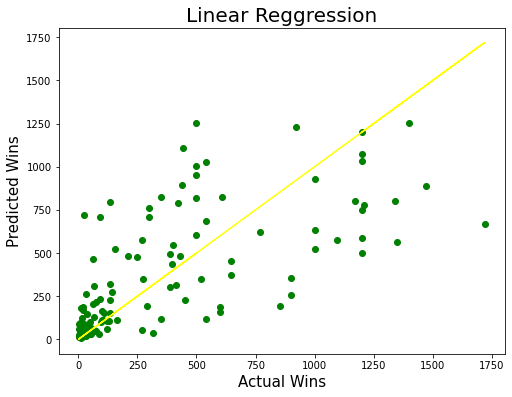

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='yellow')
plt.xlabel('Actual Wins',fontsize=15)
plt.ylabel('Predicted Wins',fontsize=15)
plt.title('Linear Reggression',fontsize=20)
plt.show()

we see that lot of outliers are present ,and that is why our accuracy is depreciated. We can further decrease the ouliers but we will losse too much data, which is not advised

# Saving the best model

In [127]:
import pickle
filename='Global_Power_Plant_regression_E4.pkl'
pickle.dump(rf,open(filename,'wb'))